<a href="https://colab.research.google.com/github/KlavMar/scrapping_restaurants_bordeaux/blob/main/Scrapping_restaurants_bordeaux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd 
import numpy as np
import json 
import re
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import folium
import plotly.graph_objects as go 
import os
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
def go_figure(df,x,y,y2,title,nameAxis,nameOrdonnees):
    fig=go.Figure()
    fig.add_trace(go.Scatter(x=df[x],y=df[y]))
    fig.add_trace(go.Scatter(x=df[x],y=df[y2]))

    styleGraph(fig,title,nameAxis,nameOrdonnees)
    return fig
def styleGraph(fig,title,nameAxis,nameOrdonnees):
    return fig.update_layout(
    title=title,
    xaxis_title=nameAxis,
    yaxis_title=nameOrdonnees,
    font=dict( 
        family="Arial",
        size=18,
        color="#000",
        
    ),
    )

In [ ]:
def saveCsvOnfolder(df,cheminPath,nameFile):
        if os.path.exists(f'{cheminPath}'):
            df.to_csv(os.path.join(cheminPath,nameFile),sep=";")
        else:
            os.mkdir(f'{cheminPath}')
            df.to_csv(os.path.join(cheminPath,nameFile),sep=";")

In [ ]:
if input('Connect Drive ? ').upper()=='Y':
    from google.colab import drive
    drive.mount('/content/drive')
else: 
    pass
    

Connect Drive ? y
Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/project_perso/scrapping/"

In [ ]:
url="https://www.tripadvisor.fr/Restaurants-g187079-Bordeaux_Gironde_Nouvelle_Aquitaine.html"

navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'

In [ ]:
data = requests.get(url,headers={'User-Agent': navigator})

In [ ]:
data

<Response [200]>

In [ ]:
data.text

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml" lang="fr-FR">\n<head>\n<meta http-equiv="content-type" content="text/html; charset=utf-8"/>\n<link rel=\'stylesheet\' type=\'text/css\' href=\'https://static.tacdn.com/css2/build/concat/long_lived_global_legacy-v2249465669a.css\' data-rup=\'long_lived_global_legacy\'/>\n<link rel="icon" id="favicon" href="https://static.tacdn.com/favicon.ico?v2" type="image/x-icon"/>\n<link rel="preload" href="https://static.tacdn.com/css2/webfonts/TripAdvisor/TripAdvisor_Regular.woff2?v004.023" as="font" type="font/woff2" crossorigin>\n<link rel="stylesheet" href="https://static.tacdn.com/css2/webfonts/TripSans/TripSans.css?v1.002" crossorigin>\n<link rel="mask-icon" sizes="any" href="https://static.tacdn.com/img2/brand_refresh/application_icons/mask-icon.svg" color="#000000"/>\n<script type=\'text/javascript\' data-rup=\'global_error\'>!function(){function e(e){return"object"==typeof e&&"WARN"===e.level?"WARN":"ERROR"}function r(r,t

In [ ]:
soup = BeautifulSoup(data.text, 'html.parser')
card = soup.find_all('div', {"class" : "zdCeB"})

In [ ]:
card[2]

<div class="zdCeB Vt o"><div class="tkvCJ u F f Ff K"><div class="RfBGI"><span><a class="Lwqic Cj b" href="/Restaurant_Review-g207338-d10150117-Reviews-BLISSS-Merignac_Bordeaux_Gironde_Nouvelle_Aquitaine.html" target="_blank">2<!-- -->. <!-- -->BLISSS</a></span></div></div><div class="QZaIQ o"><div><div class="nrKLE PQvPS"><span class="CDQCc qAvoV"><span class="ABgbd"><span><a class="aWhIG _S " href="/Restaurant_Review-g207338-d10150117-Reviews-BLISSS-Merignac_Bordeaux_Gironde_Nouvelle_Aquitaine.html#REVIEWS" target="_blank"><span class="LBKCf"><svg aria-label="5,0 sur 5 bulles" class="UctUV d H0" height="16" viewbox="0 0 128 24" width="88"><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform=""></path><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform="translate(26 0)"></path><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform="translate(52 0)

In [ ]:
title="Lwqic"
class_span="ABgbd"
fourchette_prix="qAvoV"
a='RfBGI'


In [ ]:
card[3].find(class_=title).get_text()

'3. Restaurant Epicentre'

In [ ]:
re.findall('[^\s]([a-zA-Z]*[\sa-zA-Z]*)',card[3].find(class_=title).get_text())[1]

' Restaurant Epicentre'

In [ ]:
card[3].find(class_=title).get_text()

'3. Restaurant Epicentre'

In [ ]:
#
f"https://www.tripadvisor.fr{card[3].find_all('a', href=True)[0]['href']}"

'https://www.tripadvisor.fr/Restaurant_Review-g187079-d9581540-Reviews-Restaurant_Epicentre-Bordeaux_Gironde_Nouvelle_Aquitaine.html'

In [ ]:
card[3].find(class_=a).get_text()

'3. Restaurant Epicentre'

In [ ]:
span=card[3].find_all("span",{'class':class_span})

In [ ]:
card[3].find_all("span",{'class':class_span})

[<span class="ABgbd"><span><a class="aWhIG _S " href="/Restaurant_Review-g187079-d10106575-Reviews-Le_Bistrot_de_Tutelle_Bordeaux-Bordeaux_Gironde_Nouvelle_Aquitaine.html#REVIEWS" target="_blank"><span class="LBKCf"><svg aria-label="4,5 sur 5 bulles" class="UctUV d H0" height="16" viewbox="0 0 128 24" width="88"><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform=""></path><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform="translate(26 0)"></path><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform="translate(52 0)"></path><path d="M 12 0C5.388 0 0 5.388 0 12s5.388 12 12 12 12-5.38 12-12c0-6.612-5.38-12-12-12z" transform="translate(78 0)"></path><path d="M 12 0C5.389 0 0 5.389 0 12c0 6.62 5.389 12 12 12 6.62 0 12-5.379 12-12S18.621 0 12 0zm0 2a9.984 9.984 0 0110 10 9.976 9.976 0 01-10 10z" transform="translate(104 0)"></path></svg></span><span

In [ ]:
for i in card[3].find_all("span",{'class':class_span}):
    print(re.match('€*[^\s]',i.text))

<re.Match object; span=(0, 1), match='2'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 2), match='€€'>


In [ ]:
for value in span:
    print(value.text)

90 avis
Ouvert
Française, Saine
€€ - €€€


In [ ]:
len(card)

37

In [ ]:
restaurants={}
for restaurant in range (len(card)):
    title_restaurant=card[restaurant].find(class_=title).get_text()
    avis=card[restaurant].find_all("span",{'class':class_span})[0].text
    type_cuisine = card[restaurant].find_all("span",{'class':class_span})[2].text
    fourchette_prix = card[restaurant].find_all("span",{'class':class_span})[3].text
    link=f"https://www.tripadvisor.fr{card[restaurant].find_all('a', href=True)[0]['href']}"
    restaurants.update({title_restaurant:[avis,type_cuisine,fourchette_prix,link]})
  
pd.DataFrame.from_dict(restaurants,orient='index').reset_index().rename(columns={'index':'Restaurant',0:'Avis',1:'type_cuisine',2:'fourchette_prix',3:'link'})

,Restaurant,Avis,type_cuisine,fourchette_prix,link
0,Atelier Des Faures,56 avis,"Française, Internationale",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...
1,1. Son' Restaurant,756 avis,"Française, Européenne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...
2,2. BLISSS,1 503 avis,"Française, Moderne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...
3,3. Restaurant Epicentre,90 avis,"Française, Saine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...
4,4. Restaurant Arcada Bordeaux,406 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...
5,5. Restaurant Loco By Jem’s Bordeaux,288 avis,"Française, Brasserie gastronomique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...
6,Carioca Restaurante Bordeaux,283 avis,"Brésilienne, Latino",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...
7,6. Restaurant La Fine Bouche Bordeaux,145 avis,"Française, Saine",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...
8,7. Suzzi,281 avis,"Saine, Suédoise",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...
9,8. Dans le Noir ? Bordeaux,676 avis,"Française, Européenne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...


In [ ]:
res

{' Restaurant Epicentre': '474 avis'}

In [ ]:
500//30
30*17

510

In [ ]:
create_url=[]
for i in range(0,510,30):
    create_url.append(
    f"https://www.tripadvisor.fr/RestaurantSearch-g187079-oa{i}-a_date.2022__2D__09__2D__02-a_people.2-a_time.20%3A00%3A00-a_zur.2022__5F__09__5F__02-Bordeaux.html#EATERY_LIST_CONTENTS")

In [ ]:
create_url

In [ ]:
%%time
restaurants={}
for i in create_url:
    data = requests.get(i,headers={'User-Agent': navigator})
    soup = BeautifulSoup(data.text, 'html.parser')
    card = soup.find_all('div', {"class" : "zdCeB"})   

    
    for restaurant in range (len(card)):
        try:
            title_restaurant=card[restaurant].find(class_=title).get_text()
        except:
            title =""
        avis=card[restaurant].find_all("span",{'class':class_span})[0].text
        try:
            type_cuisine = card[restaurant].find_all("span",{'class':class_span})[2].text
            fourchette_prix = card[restaurant].find_all("span",{'class':class_span})[3].text
        except:
            try:
                col_cuisine=card[restaurant].find_all("span",{'class':class_span})[1].text
            except:
                col_cuisine="NaN"
            if col_cuisine not in  ["Fermé à l'heure actuelle",'Ouvert','€']:
                try:
                    type_cuisine=card[restaurant].find_all("span",{'class':class_span})[1].text
                except:
                    pass
                try:
                    fourchette_prix = card[restaurant].find_all("span",{'class':class_span})[2].text
                except:
                    fourchette_prix="NaN"
            else:
                type_cuisine="NaN"
                fourchette_prix = "NaN"
        link=f"https://www.tripadvisor.fr{card[restaurant].find_all('a', href=True)[0]['href']}"
        restaurants.update({title_restaurant:[avis,type_cuisine,fourchette_prix,link]})
    
df = pd.DataFrame.from_dict(restaurants,orient='index').reset_index().rename(columns={'index':'Restaurant',0:'Avis',1:'type_cuisine',2:'fourchette_prix',3:'link'}) 



In [ ]:
df[df.type_cuisine=="NaN"]

,Restaurant,Avis,type_cuisine,fourchette_prix,link
68,68. Voilà Bar à Vins du Monde Bordeaux,259 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
168,168. Contrast,145 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
238,238. del'Ice n'Coffee Bordeaux,100 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
396,396. Bread Storming Bordeaux,69 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
413,413. Brutus Bordeaux,35 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...


In [ ]:
df[df.fourchette_prix=="NaN"]

,Restaurant,Avis,type_cuisine,fourchette_prix,link
68,68. Voilà Bar à Vins du Monde Bordeaux,259 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
74,74. Restaurant TentaziOni Bordeaux,397 avis,€€ - €€€,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
168,168. Contrast,145 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
238,238. del'Ice n'Coffee Bordeaux,100 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
396,396. Bread Storming Bordeaux,69 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
413,413. Brutus Bordeaux,35 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...


In [ ]:
df[(df.fourchette_prix=="NaN") | (df.type_cuisine=="NaN") ]

,Restaurant,Avis,type_cuisine,fourchette_prix,link
68,68. Voilà Bar à Vins du Monde Bordeaux,259 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
74,74. Restaurant TentaziOni Bordeaux,397 avis,€€ - €€€,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
168,168. Contrast,145 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
238,238. del'Ice n'Coffee Bordeaux,100 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
396,396. Bread Storming Bordeaux,69 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...
413,413. Brutus Bordeaux,35 avis,NaN,NaN,https://www.tripadvisor.fr/Restaurant_Review-g...


In [ ]:
df=pd.merge(df,df.type_cuisine.str.split(",",expand=True),how="inner",left_index=True,right_index=True)

In [ ]:
df

,Restaurant,Avis,type_cuisine,fourchette_prix,link,0,1
0,Annonce de :,349 avis,"Japonaise, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Japonaise,Asiatique
1,1. Son' Restaurant,756 avis,"Française, Européenne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne
2,2. BLISSS,1 503 avis,"Française, Moderne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Moderne
3,3. Restaurant Epicentre,90 avis,"Française, Saine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Saine
4,4. Restaurant Arcada Bordeaux,406 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne
...,...,...,...,...,...,...,...
506,506. L'Univerre Restaurant Bordeaux,121 avis,"Française, Bar à vins",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Bar à vins
507,507. Thai Paradise Bordeaux,235 avis,"Thaï, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Thaï,Asiatique
508,508. Brasserie Basile,126 avis,Française,€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,None
509,509. Roze Bordeaux Café Pâtisseries,37 avis,"Française, Américaine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Américaine


In [ ]:
df.link[0]

'https://www.tripadvisor.fr/Restaurant_Review-g187079-d24194154-Reviews-Gustave_Creative_Street_food-Bordeaux_Gironde_Nouvelle_Aquitaine.html'

## Création des URL 

In [ ]:
url_link_df=[]
for i in df.link:
    url_link_df.append(i)

## Récupération note 

In [ ]:
note = "ZDEqb"
data = requests.get(url_link_df[1],headers={'User-Agent': navigator})

soup = BeautifulSoup(data.text, 'html.parser')
card = soup.find_all('span', {"class" : note})

In [ ]:
card[0].text

'5,0\xa0'

## récupération données géo

In [ ]:
address = "yEWoV"
data = requests.get(url_link_df[1],headers={'User-Agent': navigator})
soup = BeautifulSoup(data.text, 'html.parser')
card = soup.find_all('span', {"class" : address})

In [ ]:
card[0].text

'14 rue Paul Louis Lande, 33000, Bordeaux France'

In [ ]:
link_main = 'https://nominatim.openstreetmap.org/?q='
address = card[0].text
link_end = '&format=json&limit=1'

link = link_main + address.replace(" ","+").replace(",","")
print(link + link_end)

https://nominatim.openstreetmap.org/?q=14+rue+Paul+Louis+Lande+33000+Bordeaux+France&format=json&limit=1


In [ ]:
def create_url_openstreet(address):
    address=address.replace(" ","+").replace(",","")
    link_openstreet =f"https://nominatim.openstreetmap.org/?q='{address}'&format=json&limit=1"
    return link_openstreet

In [ ]:
create_url_openstreet(card[0].text)

"https://nominatim.openstreetmap.org/?q='14+rue+Paul+Louis+Lande+33000+Bordeaux+France'&format=json&limit=1"

In [ ]:
def findCoordinates(url):
    req=requests.get(url).json()
    coordinates=[float(req[0]['lat']),float(req[0]['lon'])]
    return coordinates


In [ ]:
df.type_cuisine[0]

'Vietnamienne'

In [ ]:
findCoordinates("https://nominatim.openstreetmap.org/?q=14+rue+Paul+Louis+Lande+33000+Bordeaux+France&format=json&limit=1")

[44.8345845, -0.5753745]

In [ ]:
point=findCoordinates("https://nominatim.openstreetmap.org/?q=14+rue+Paul+Louis+Lande+33000+Bordeaux+France&format=json&limit=1")
print(point)
m = folium.Map(location=point,zoom_start=20)
folium.Marker(
    location=point,
    popup=df.type_cuisine[0]+" "+df.fourchette_prix[0]
    ).add_to(m)
#m


[44.8345845, -0.5753745]


In [ ]:
create_url_openstreet(df_final)

In [ ]:
create_url_openstreet("3 Rue Gaspard Philippe Basilique Saint Michel, 33000, Bordeaux France")

"https://nominatim.openstreetmap.org/?q='3+Rue+Gaspard+Philippe+Basilique+Saint+Michel+33000+Bordeaux+France'&format=json&limit=1"

# Create Big Function

In [ ]:
url_link={}
for col,value in df.iterrows():
    title = value["Restaurant"]
    link = value['link']
    url_link.update({title:link})

In [ ]:
%%time
note_geo_df={}

for key,value in url_link.items():

    note = "ZDEqb"
    address = "yEWoV"
    data = requests.get(value,headers={'User-Agent': navigator})

    soup = BeautifulSoup(data.text, 'html.parser')
    note_recup = soup.find_all('span', {"class" : note})
    note_insert=note_recup[0].text
    
    try:
        geo = soup.find_all('span', {"class" : address})
    
        loc=findCoordinates(create_url_openstreet(geo[0].text))
    except:
        loc="NaN"
    note_geo_df.update({key:[note_insert,loc]})

 

CPU times: user 2min 11s, sys: 2.45 s, total: 2min 13s
Wall time: 12min 41s


In [ ]:
df_final = pd.DataFrame.from_dict(note_geo_df,orient='index').reset_index().rename(columns={'index':'restaurants',0:'note',1:'localisation'})

In [ ]:
df_final

,restaurants,note,localisation
0,Annonce de :,"4,5","[44.8412142, -0.5726546]"
1,1. Son' Restaurant,"5,0","[44.8345845, -0.5753745]"
2,2. BLISSS,"5,0","[44.8568622, -0.6583235]"
3,3. Restaurant Epicentre,"5,0","[44.8414065, -0.5736823]"
4,4. Restaurant Arcada Bordeaux,"5,0","[44.8376112, -0.5690493]"
...,...,...,...
506,506. L'Univerre Restaurant Bordeaux,"4,0","[44.8354109, -0.5831949]"
507,507. Thai Paradise Bordeaux,"4,0","[44.8365075, -0.575302]"
508,508. Brasserie Basile,"4,0",NaN
509,509. Roze Bordeaux Café Pâtisseries,"4,5","[44.837637, -0.5671205]"


In [ ]:
df_final=df.merge(df_final,how="inner",left_on="Restaurant",right_on="restaurants")

In [ ]:
df_final.rename(columns=({0:'type_cuisine_1',1:'type_cuisine_2'}),inplace=True)

,Restaurant,Avis,type_cuisine,fourchette_prix,link,type_cuisine_1,type_cuisine_2,restaurants,note,localisation
0,Annonce de :,349 avis,"Japonaise, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Japonaise,Asiatique,Annonce de :,4.5,"[44.8412142, -0.5726546]"
1,1. Son' Restaurant,756 avis,"Française, Européenne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,1. Son' Restaurant,5.0,"[44.8345845, -0.5753745]"
2,2. BLISSS,1 503 avis,"Française, Moderne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Moderne,2. BLISSS,5.0,"[44.8568622, -0.6583235]"
3,3. Restaurant Epicentre,90 avis,"Française, Saine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Saine,3. Restaurant Epicentre,5.0,"[44.8414065, -0.5736823]"
4,4. Restaurant Arcada Bordeaux,406 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,4. Restaurant Arcada Bordeaux,5.0,"[44.8376112, -0.5690493]"
...,...,...,...,...,...,...,...,...,...,...
506,506. L'Univerre Restaurant Bordeaux,121 avis,"Française, Bar à vins",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Bar à vins,506. L'Univerre Restaurant Bordeaux,4.0,"[44.8354109, -0.5831949]"
507,507. Thai Paradise Bordeaux,235 avis,"Thaï, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Thaï,Asiatique,507. Thai Paradise Bordeaux,4.0,"[44.8365075, -0.575302]"
508,508. Brasserie Basile,126 avis,Française,€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,None,508. Brasserie Basile,4.0,0
509,509. Roze Bordeaux Café Pâtisseries,37 avis,"Française, Américaine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Américaine,509. Roze Bordeaux Café Pâtisseries,4.5,"[44.837637, -0.5671205]"


In [ ]:
df_final.localisation=df_final.localisation.apply(lambda x:0 if x=='NaN' else x)

In [ ]:
df_final.note= df_final.note.str.replace(",",".").astype("float64")

In [ ]:
df_final.note.value_counts(normalize=True).reset_index()

,index,note
0,4.5,0.547945
1,4.0,0.273973
2,5.0,0.158513
3,3.5,0.019569


In [ ]:
saveCsvOnfolder(df_final,path,'df.csv')

In [ ]:
px.histogram(data_frame=df_final,x='type_cuisine_1').update_xaxes(categoryorder='total descending')

In [ ]:
px.histogram(data_frame=df_final,x='type_cuisine_2').update_xaxes(categoryorder='total descending')

In [ ]:
px.pie(data_frame=df_final.note.value_counts(normalize=True).reset_index(),values='note',names="index")

In [ ]:
df_final[df_final.localisation=="NaN"]

,Restaurant,Avis,type_cuisine,fourchette_prix,link,0,1,restaurants,note,localisation


In [ ]:
df_final.localisation[0]

[44.8412142, -0.5726546]

In [ ]:
index=0
m = folium.Map(location=point,zoom_start=15)
for rank in range(len(df_final.localisation)):
    if df_final.localisation[rank]!=0:
        if df_final.note[rank]==5:
            color="#43A047"
        elif df_final.note[rank]<5 and df_final.note[rank]>=4:
            color="#D4E157"
        elif df_final.note[rank]<4 and df_final.note[rank]>3:
            color="#FFA726"
        else:
            color="#E53935"
        point=df_final.localisation[rank]
        folium.Marker(
        location=point,
        width='60%',
        height='30%',
        icon=folium.Icon(color="black",icon_color=color),
        popup=f"Nom {df_final.Restaurant[rank]} \n Cusine : {df_final.type_cuisine[rank]}\n Prix: {df_final.fourchette_prix[rank]},\n Note:{df_final.note[rank]}\n Avis:{df_final.Avis[rank]} \n lien {df_final.link[rank]}"
        ).add_to(m)
    index+=1
m

In [ ]:
df_final.fourchette_prix.value_counts()

€€ - €€€    394
€            64
€€€€         47
NaN           6
Name: fourchette_prix, dtype: int64

In [ ]:
        df_final.fourchette_prix[0]=="€€ - €€€"

True

In [ ]:
df_final

,Unnamed: 0,Restaurant,Avis,type_cuisine,fourchette_prix,link,type_cuisine_1,type_cuisine_2,restaurants,note,localisation,lat,lon
0,0,Annonce de :,349 avis,"Japonaise, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Japonaise,Asiatique,Annonce de :,4.5,"[44.8412142, -0.5726546]",44.841214,-0.572655
1,1,1. Son' Restaurant,756 avis,"Française, Européenne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,1. Son' Restaurant,5.0,"[44.8345845, -0.5753745]",44.834584,-0.575375
2,2,2. BLISSS,1 503 avis,"Française, Moderne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Moderne,2. BLISSS,5.0,"[44.8568622, -0.6583235]",44.856862,-0.658323
3,3,3. Restaurant Epicentre,90 avis,"Française, Saine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Saine,3. Restaurant Epicentre,5.0,"[44.8414065, -0.5736823]",44.841406,-0.573682
4,4,4. Restaurant Arcada Bordeaux,406 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,4. Restaurant Arcada Bordeaux,5.0,"[44.8376112, -0.5690493]",44.837611,-0.569049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,504. Restaurant La Cheminée Royale,769 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,504. Restaurant La Cheminée Royale,3.5,"[44.841166, -0.5733326]",44.841166,-0.573333
414,414,505. La Brasserie du Sud Ouest,133 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,505. La Brasserie du Sud Ouest,4.0,"[44.8195877, -0.5724574]",44.819588,-0.572457
415,415,506. L'Univerre Restaurant Bordeaux,121 avis,"Française, Bar à vins",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Bar à vins,506. L'Univerre Restaurant Bordeaux,4.0,"[44.8354109, -0.5831949]",44.835411,-0.583195
416,416,507. Thai Paradise Bordeaux,235 avis,"Thaï, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Thaï,Asiatique,507. Thai Paradise Bordeaux,4.0,"[44.8365075, -0.575302]",44.836508,-0.575302


In [ ]:
import branca
from folium import plugins

In [ ]:
index=0
m = folium.Map(location=(df_final.lat[1],df_final.lon[1]),zoom_start=15)
location=df_final[["lat","lon"]]
plugins.MarkerCluster(location).add_to(m)
for rank in range(len(df_final.localisation)):
    if df_final.localisation[rank]!=0:
        if  df_final.fourchette_prix[rank]=="€":
            color="#43A047"
        elif  df_final.fourchette_prix[rank]=="€€ - €€€":
            color="#D4E157"
        elif df_final.fourchette_prix[rank]=="€€€€":
            color="#FFA726"
        else:
            color="black"
        point=df_final.localisation[rank]
        folium.Marker(
        location=(df_final.lat[rank],df_final.lon[rank]),
        width='60%',
        height='30%',
        icon=folium.Icon(color="black",icon_color=color),
        popup=f"Nom {df_final.Restaurant[rank]} \n Cusine : {df_final.type_cuisine[rank]}\n Prix: {df_final.fourchette_prix[rank]},\n Note:{df_final.note[rank]}\n Avis:{df_final.Avis[rank]} \n lien {df_final.link[rank]}"
        ).add_to(m)

    index+=1


m

In [ ]:
list(df_final.localisation)[0][0]

44.8412142

In [ ]:
list(df_final.localisation)[0][1]

-0.5726546

In [ ]:
lon_lat={}
for col, value in df_final.iterrows():
    try:
        local = list(value['localisation'])
        lon_lat.update({value['Restaurant']:[local[0],local[1]]})
    except:
        pass

In [ ]:
df_final=df_final.merge(pd.DataFrame.from_dict(data=lon_lat,orient='index').reset_index().rename(columns={'index':'Restaurant'}),left_on="Restaurant",right_on="Restaurant").rename(columns={0:'lat',1:'lon'})

In [ ]:
df_final.drop(columns=['0_x','1_x','0_y','1_y'],inplace=True)

In [ ]:
df_final

,Restaurant,Avis,type_cuisine,fourchette_prix,link,type_cuisine_1,type_cuisine_2,restaurants,note,localisation,lat,lon
0,Annonce de :,349 avis,"Japonaise, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Japonaise,Asiatique,Annonce de :,4.5,"[44.8412142, -0.5726546]",44.841214,-0.572655
1,1. Son' Restaurant,756 avis,"Française, Européenne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,1. Son' Restaurant,5.0,"[44.8345845, -0.5753745]",44.834584,-0.575375
2,2. BLISSS,1 503 avis,"Française, Moderne",€€€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Moderne,2. BLISSS,5.0,"[44.8568622, -0.6583235]",44.856862,-0.658323
3,3. Restaurant Epicentre,90 avis,"Française, Saine",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Saine,3. Restaurant Epicentre,5.0,"[44.8414065, -0.5736823]",44.841406,-0.573682
4,4. Restaurant Arcada Bordeaux,406 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,4. Restaurant Arcada Bordeaux,5.0,"[44.8376112, -0.5690493]",44.837611,-0.569049
...,...,...,...,...,...,...,...,...,...,...,...,...
413,504. Restaurant La Cheminée Royale,769 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,504. Restaurant La Cheminée Royale,3.5,"[44.841166, -0.5733326]",44.841166,-0.573333
414,505. La Brasserie du Sud Ouest,133 avis,"Française, Européenne",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Européenne,505. La Brasserie du Sud Ouest,4.0,"[44.8195877, -0.5724574]",44.819588,-0.572457
415,506. L'Univerre Restaurant Bordeaux,121 avis,"Française, Bar à vins",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Française,Bar à vins,506. L'Univerre Restaurant Bordeaux,4.0,"[44.8354109, -0.5831949]",44.835411,-0.583195
416,507. Thai Paradise Bordeaux,235 avis,"Thaï, Asiatique",€€ - €€€,https://www.tripadvisor.fr/Restaurant_Review-g...,Thaï,Asiatique,507. Thai Paradise Bordeaux,4.0,"[44.8365075, -0.575302]",44.836508,-0.575302


In [ ]:
saveCsvOnfolder(df_final,path,'df.csv')

In [ ]:
df=pd.read_csv(f'{path}/df.csv',sep=";")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       418 non-null    int64  
 1   Restaurant       418 non-null    object 
 2   Avis             418 non-null    object 
 3   type_cuisine     413 non-null    object 
 4   fourchette_prix  412 non-null    object 
 5   link             418 non-null    object 
 6   type_cuisine_1   413 non-null    object 
 7   type_cuisine_2   347 non-null    object 
 8   restaurants      418 non-null    object 
 9   note             418 non-null    float64
 10  localisation     418 non-null    object 
 11  lat              418 non-null    float64
 12  lon              418 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 42.6+ KB


In [ ]:
df.Avis=df.Avis.apply(lambda x:re.findall('\d*',x)[0])

In [ ]:
df.Avis=df.Avis.astype('int64')

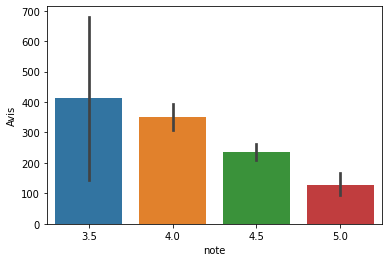

In [ ]:

sns.barplot(data=df,y="Avis",x="note")
plt.show()